### Разработка концепции ранжирования районов города по уровню самодостаточности на основе больших данных

###### Используемые библиотеки 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

###### Загружаем наши датасеты 

In [2]:
adm2fishnet = pd.read_csv('adm2fishnet.csv',sep=';',low_memory = False)

In [29]:
Clocation1 = pd.read_csv('01_Clocation_202109.csv.gz',low_memory = False)

In [33]:
CDensity2 = pd.read_csv('02_CDensity_202109.csv.gz',low_memory = False)

In [ ]:
CMatrix3 = pd.read_csv('03_CMatrix_202109.csv.gz',low_memory = False)

In [34]:
CMatrix4 = pd.read_csv('04_CMatrix_Home_work_202109.csv.gz',low_memory = False)

#### Изучим датасеты

Начнем изучение с adm2fishnet

In [3]:
adm2fishnet

,WKT,cell_zid,adm_name,okrug_name,sub_ter
0,MULTIPOLYGON (((38.6495389842383 54.2597139180...,0,Серебряные пруды,NaN,Московская область
1,MULTIPOLYGON (((38.6549362377517 54.2572466621...,1,Серебряные пруды,NaN,Московская область
2,MULTIPOLYGON (((38.6625773861122 54.2560891872...,2,Серебряные пруды,NaN,Московская область
3,MULTIPOLYGON (((38.670279125503 54.25708620909...,3,Серебряные пруды,NaN,Московская область
4,MULTIPOLYGON (((38.6779821287111 54.2581143832...,4,Серебряные пруды,NaN,Московская область
...,...,...,...,...,...
203629,MULTIPOLYGON (((37.7014749758556 56.9583390185...,190237,Талдом,NaN,Московская область
203630,MULTIPOLYGON (((37.7014595432799 56.9554785760...,190238,Талдом,NaN,Московская область
203631,MULTIPOLYGON (((37.7096782769011 56.9554650704...,190239,Талдом,NaN,Московская область
203632,MULTIPOLYGON (((37.7178970011675 56.9554510250...,190240,Талдом,NaN,Московская область


Названия столбцов на русском языке
- WKT
- идентификатор ячейки
- имя adm название
- округа
- подуровень

Well-known text (WKT) - это язык разметки текста для представления объектов векторной геометрии. Двоичный эквивалент, известный как хорошо известный двоичный код (WKB), используется для передачи и хранения одной и той же информации в более компактной форме, удобной для компьютерной обработки, но не читаемой человеком.

In [4]:
adm2fishnet.shape
# Размер сета 
# 203634 записи-----5 столбцов

(203634, 5)

In [5]:
adm2fishnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203634 entries, 0 to 203633
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   WKT         203634 non-null  object
 1   cell_zid    203634 non-null  int64 
 2   adm_name    203634 non-null  object
 3   okrug_name  14073 non-null   object
 4   sub_ter     203634 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.8+ MB


Посмотрим количество пропусков 

In [6]:
print(adm2fishnet.isna().sum()/len(adm2fishnet)*100)

WKT            0.000000
cell_zid       0.000000
adm_name       0.000000
okrug_name    93.089072
sub_ter        0.000000
dtype: float64


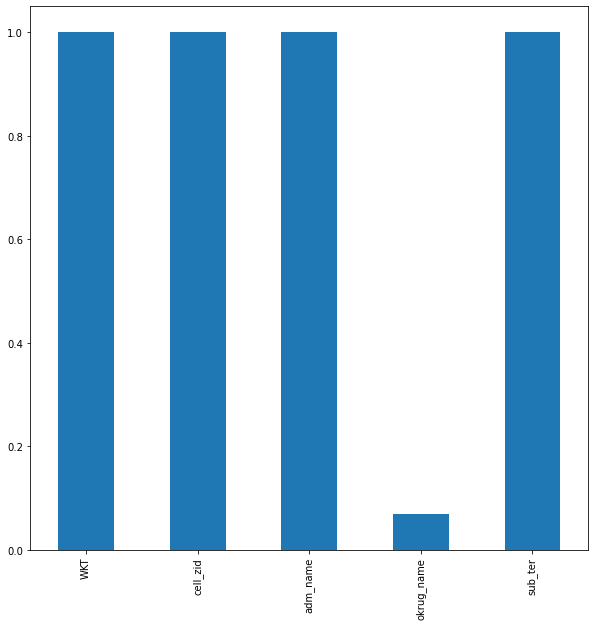

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
(1 - adm2fishnet.isnull().mean()).abs().plot.bar(ax=ax);

Столбец okrug_name имеет 93% пропусков 

In [8]:
adm2fishnet.adm_name.unique()

array(['Серебряные пруды', 'Зарайск', 'Кашира', 'Серпухов', 'Луховицы',
       'Коломна', 'Пущино', 'Ступино', 'Протвино', 'Чехов', 'Егорьевск',
       'Шатура', 'Домодедово', 'Роговское', 'Наро-Фоминск', 'Кленовское',
       'Воскресенск', 'Вороновское', 'Раменское', 'Можайск', 'Подольск',
       'Щаповское', 'Молодежный', 'Киевский', 'Краснопахорское',
       'Новофедоровское', 'Михайлово-Ярцевское', 'Руза', 'Бронницы',
       'Орехово-Зуево', 'Рязановское', 'Первомайское', 'Троицк',
       'Десеновское', 'Одинцово', 'Воскресенское', 'Видное (Ленинский)',
       'Щербинка', 'Южное Бутово', 'Сосенское', 'Жуковский',
       'Филимонковское', 'Марушкинское', 'Северное Бутово', 'Лыткарино',
       'Чертаново Южное', 'Люберцы', 'Бирюлево Западное',
       'Бирюлево Восточное', 'Краснознаменск', 'Московский', 'Кокошкино',
       'Внуково', 'Ясенево', 'Орехово-Борисово Южное', 'Дзержинский',
       'Внуковское', 'Мосрентген', 'Чертаново Центральное', 'Теплый Стан',
       'Орехово-Борисово 

In [9]:
adm2fishnet.okrug_name.unique()

array([nan, 'Троицкий административный округ',
       'Новомосковский административный округ',
       'Юго-Западный административный округ',
       'Южный административный округ', 'Западный административный округ',
       'Юго-Восточный административный округ',
       'Восточный административный округ',
       'Центральный административный округ',
       'Северо-Западный административный округ',
       'Северный административный округ',
       'Северо-Восточный административный округ',
       'Зеленоградский административный округ'], dtype=object)

Пока не будем удалять этот столбец 
- Но с таким количеством пропусков он не несет нам никакой пользы 

###### Столбец WKT

In [10]:
adm2fishnet.WKT

0         MULTIPOLYGON (((38.6495389842383 54.2597139180...
1         MULTIPOLYGON (((38.6549362377517 54.2572466621...
2         MULTIPOLYGON (((38.6625773861122 54.2560891872...
3         MULTIPOLYGON (((38.670279125503 54.25708620909...
4         MULTIPOLYGON (((38.6779821287111 54.2581143832...
                                ...                        
203629    MULTIPOLYGON (((37.7014749758556 56.9583390185...
203630    MULTIPOLYGON (((37.7014595432799 56.9554785760...
203631    MULTIPOLYGON (((37.7096782769011 56.9554650704...
203632    MULTIPOLYGON (((37.7178970011675 56.9554510250...
203633    MULTIPOLYGON (((37.7261157177974 56.9554364396...
Name: WKT, Length: 203634, dtype: object

In [11]:
adm2fishnet.WKT.unique()

array(['MULTIPOLYGON (((38.6495389842383 54.2597139180127,38.6550037336665 54.2596617361031,38.6549362377517 54.2572466621498,38.6547990055632 54.2573151297299,38.6547989843156 54.2573151400193,38.6542226047501 54.2575859062988,38.6542225932158 54.2575859116281,38.6495389842383 54.2597139180127)))',
       'MULTIPOLYGON (((38.6549362377517 54.2572466621498,38.6550037336665 54.2596617361031,38.6626758192106 54.2595879882944,38.6625773861122 54.256089187263,38.6583520567161 54.2555425421106,38.6583517757201 54.2555425894958,38.6549362377517 54.2572466621498)))',
       'MULTIPOLYGON (((38.6625773861122 54.256089187263,38.6626758192106 54.2595879882944,38.6703478711047 54.2595137529146,38.670279125503 54.2570862090965,38.6687577249708 54.2568697147074,38.6687577150164 54.2568697133927,38.6662208806674 54.256560558447,38.6662208733348 54.2565605575259,38.6625773861122 54.256089187263)))',
       ...,
       'MULTIPOLYGON (((37.7096782769011 56.9554650704851,37.7096911926484 56.957765181698

###### Столбец cell_zid

In [12]:
adm2fishnet.cell_zid

0              0
1              1
2              2
3              3
4              4
           ...  
203629    190237
203630    190238
203631    190239
203632    190240
203633    190241
Name: cell_zid, Length: 203634, dtype: int64

###### Столбец adm_name

In [13]:
adm2fishnet.adm_name

0         Серебряные пруды
1         Серебряные пруды
2         Серебряные пруды
3         Серебряные пруды
4         Серебряные пруды
                ...       
203629              Талдом
203630              Талдом
203631              Талдом
203632              Талдом
203633              Талдом
Name: adm_name, Length: 203634, dtype: object

In [14]:
adm2fishnet.adm_name.unique()

array(['Серебряные пруды', 'Зарайск', 'Кашира', 'Серпухов', 'Луховицы',
       'Коломна', 'Пущино', 'Ступино', 'Протвино', 'Чехов', 'Егорьевск',
       'Шатура', 'Домодедово', 'Роговское', 'Наро-Фоминск', 'Кленовское',
       'Воскресенск', 'Вороновское', 'Раменское', 'Можайск', 'Подольск',
       'Щаповское', 'Молодежный', 'Киевский', 'Краснопахорское',
       'Новофедоровское', 'Михайлово-Ярцевское', 'Руза', 'Бронницы',
       'Орехово-Зуево', 'Рязановское', 'Первомайское', 'Троицк',
       'Десеновское', 'Одинцово', 'Воскресенское', 'Видное (Ленинский)',
       'Щербинка', 'Южное Бутово', 'Сосенское', 'Жуковский',
       'Филимонковское', 'Марушкинское', 'Северное Бутово', 'Лыткарино',
       'Чертаново Южное', 'Люберцы', 'Бирюлево Западное',
       'Бирюлево Восточное', 'Краснознаменск', 'Московский', 'Кокошкино',
       'Внуково', 'Ясенево', 'Орехово-Борисово Южное', 'Дзержинский',
       'Внуковское', 'Мосрентген', 'Чертаново Центральное', 'Теплый Стан',
       'Орехово-Борисово 

In [15]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

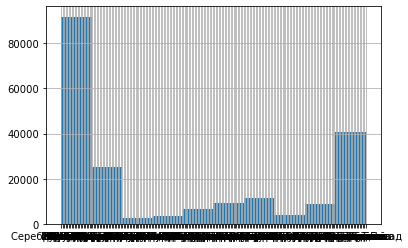

In [16]:
adm2fishnet.adm_name.hist();

###### Столбец sub_ter

In [17]:
adm2fishnet.sub_ter

0         Московская область
1         Московская область
2         Московская область
3         Московская область
4         Московская область
                 ...        
203629    Московская область
203630    Московская область
203631    Московская область
203632    Московская область
203633    Московская область
Name: sub_ter, Length: 203634, dtype: object

In [18]:
adm2fishnet.sub_ter.unique()

array(['Московская область', 'Новая Москва', 'Старая Москва'],
      dtype=object)

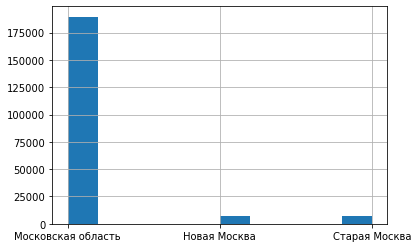

In [19]:
adm2fishnet.sub_ter.hist();

# Clocation1

In [ ]:
Clocation1

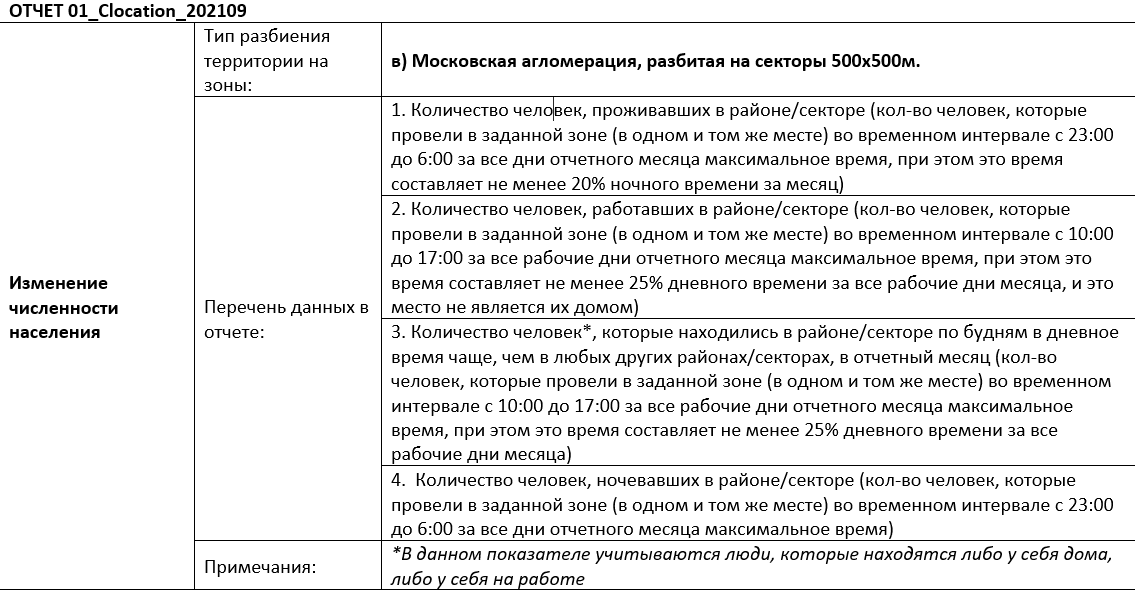

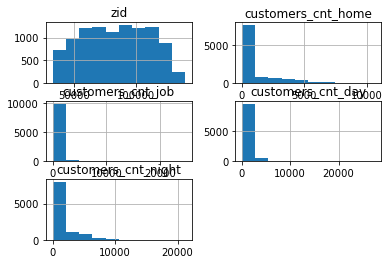

In [32]:
Clocation1.hist();

for i in adm2fishnet.cell_zid:
    print(i)

for i in len(adm2fishnet.cell_zid):
    print(adm2fishnet.cell_zid[i])

# CDensity2

In [ ]:
CDensity2

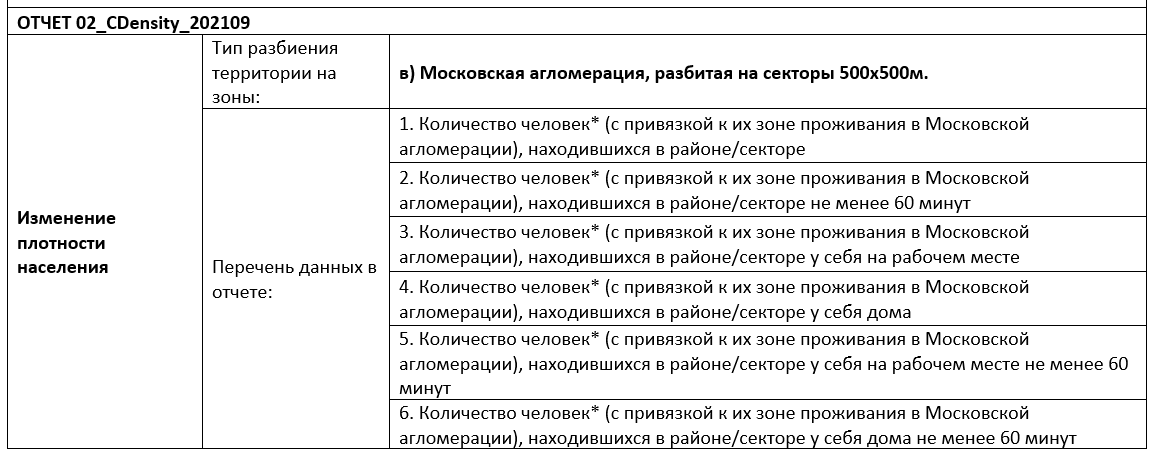

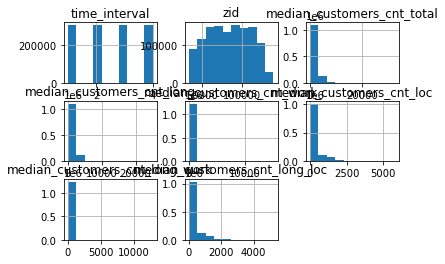

In [35]:
CDensity2.hist();

## CMatrix3

In [ ]:
CMatrix3

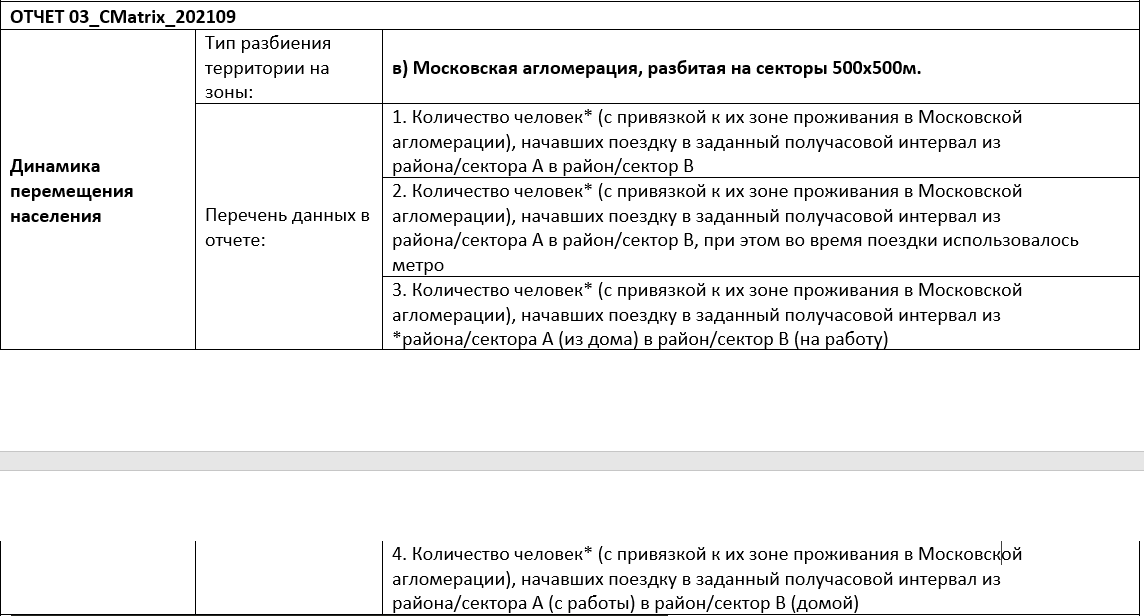

In [36]:
CMatrix3.hist()

NameError: name 'CMatrix3' is not defined

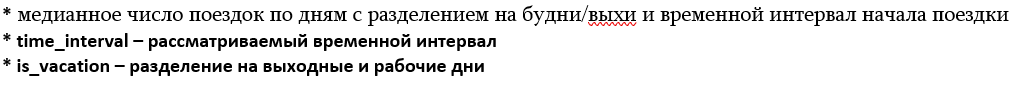

# CMatrix4

In [ ]:
CMatrix4

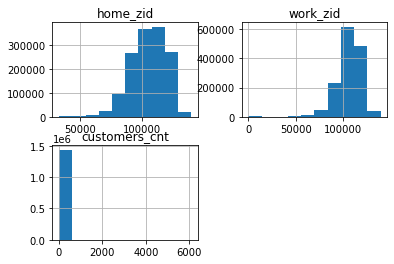

In [37]:
CMatrix4.hist();

In [ ]:
from shapely.geometry import MultiPolygon, Polygon

In [ ]:
Multi = adm2fishnet.WKT

In [ ]:
polygons = []
reserv1 = []
reserv2 = []

In [ ]:
for i in Multi:
    a = i.replace("MULTIPOLYGON ","")
    reserv1.append(a)
for i in reserv1:
    a = i.replace(")","")
    reserv2.append(i)
for i in reserv2:
    a = i.replace("(","")
    polygons.append(a)

In [ ]:
polygons

In [ ]:
multipolygon = MultiPolygon([Polygon([(38.6495389842383, 54.2597139180127), (38.6550037336665, 54.2596617361031), (38.6549362377517, 54.2572466621498), (38.6547990055632, 54.2573151297299), (38.6547989843156, 54.2573151400193), (38.6542226047501, 54.2575859062988)]),
                             Polygon([(38.6550037336665, 54.2596617361031), (38.6495389842383, 54.2597139180127), (38.6549362377517, 54.2572466621498)])])

polygons = list(multipolygon)
print(*polygons)

In [ ]:
len(polygons)

In [ ]:
polygons[1]

In [20]:
from shapely.geometry import Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).minimum_clearance

1.0